In [22]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-dataset/heart.csv


In [23]:
df=pd.read_csv("/kaggle/input/heart-disease-dataset/heart.csv")
df.shape

(1025, 14)

In [24]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [25]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")


In [26]:
features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df.drop(columns='target')
X = df[features]
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [27]:
k_values=range(2,11)
inertia_list=[]
for k in k_values:
    kmean=KMeans(k,random_state=42)
    kmean.fit(X)
    inertia_list.append(kmean.inertia_)
inertia_list

[3857.3268874233363,
 3319.881960053594,
 2970.601448242154,
 2672.29534657956,
 2479.3444400996477,
 2286.6628629810766,
 2188.168600885572,
 2063.8376848499875,
 1932.8054172391314]

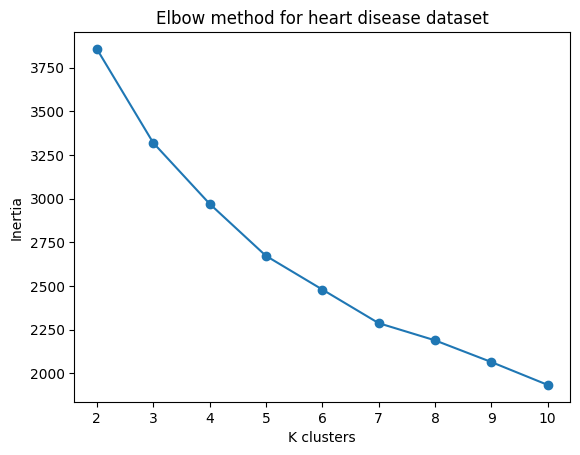

In [28]:
plt.plot(k_values,inertia_list,marker='o')
plt.xlabel("K clusters")
plt.ylabel("Inertia")
plt.title("Elbow method for heart disease dataset")
plt.show()

In [30]:
n_clusters=7
kmean=KMeans(n_clusters,random_state=42)
kmean.fit(X)
df['cluster']=kmean.labels_
centers=kmean.cluster_centers_

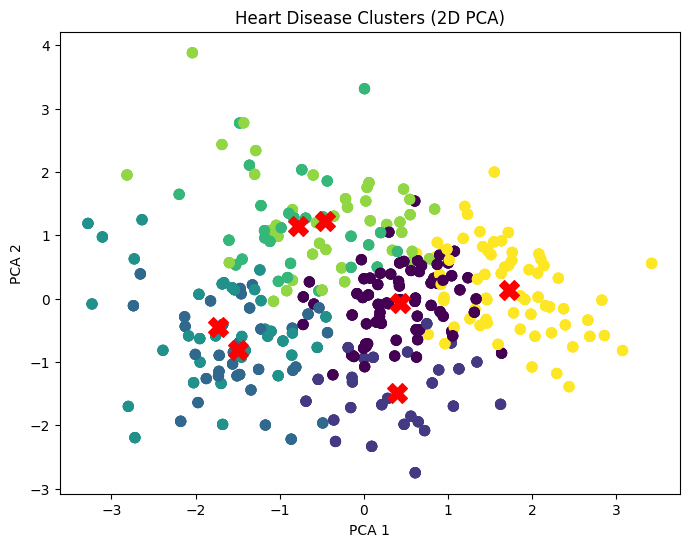

In [35]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df['cluster'], cmap='viridis', s=50)

# Plot centroids (projected to 2D)
centers_2d = pca.transform(centers)
plt.scatter(centers_2d[:,0], centers_2d[:,1], c='red', s=200, marker='X')

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Heart Disease Clusters (2D PCA)")
plt.show()


I may have used incorrect dataset for k mean clustering. We can see the grouping didnt ended up well.